In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("dairy_dataset.csv")
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [11]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")
df['Date'].head()

0   2022-02-17
1   2021-12-01
2   2022-02-28
3   2019-06-09
4   2020-12-14
Name: Date, dtype: datetime64[ns]

In [14]:
df.set_index(df['Date'],inplace=True)

In [15]:
df.index

DatetimeIndex(['2022-02-17', '2021-12-01', '2022-02-28', '2019-06-09',
               '2020-12-14', '2019-01-07', '2022-08-05', '2019-02-14',
               '2020-08-02', '2022-03-04',
               ...
               '2021-02-07', '2021-01-05', '2019-11-06', '2020-01-20',
               '2020-03-05', '2022-02-24', '2022-05-14', '2020-01-05',
               '2022-10-25', '2019-01-20'],
              dtype='datetime64[ns]', name='Date', length=4325, freq=None)

#Data for Tamil Nadu

In [38]:
tn = df[(df['Location'] == 'Tamil Nadu')]
tn.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-17,Tamil Nadu,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
2021-12-01,Tamil Nadu,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2022-02-28,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
2019-06-09,Tamil Nadu,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
2020-12-14,Tamil Nadu,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [40]:
farmsize = df[["Location","Total Land Area (acres)","Number of Cows","Farm Size"]]
farmsize.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size
Date,,,,
2022-02-17,Tamil Nadu,310.84,96,Medium
2021-12-01,Tamil Nadu,19.19,44,Large
2022-02-28,Tamil Nadu,581.69,24,Medium
2019-06-09,Tamil Nadu,908.00,89,Small
2020-12-14,Tamil Nadu,861.95,21,Medium


In [43]:
farmsize.sort_index(ascending=True,inplace=True)

In [49]:
data =farmsize['Farm Size'].value_counts().reset_index(name='Count')
data

,Farm Size,Count
0,Large,1462
1,Medium,1439
2,Small,1424


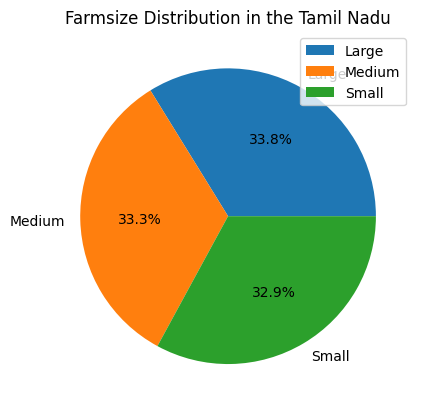

In [61]:
plt.pie(data['Count'],labels=data['Farm Size'],autopct="%1.1f%%")
plt.title("Farmsize Distribution in the Tamil Nadu")
plt.legend()
plt.show()

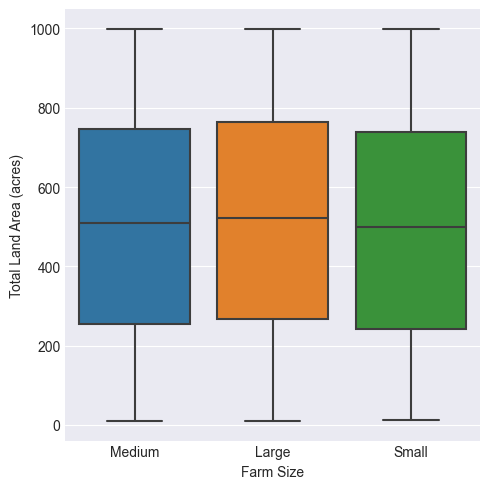

In [83]:
sns.catplot(data=farmsize,x="Farm Size",y="Total Land Area (acres)",kind="box")